## Диллема смещения и разброса. Bias vs Variance.

In [71]:
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации
plt.style.use('seaborn') # установка стиля matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, set_config, preprocessing
set_config(transform_output='pandas')

### Будем работать с датасетом из библиотеки sklearn о домах в Бостоне
[Данные теперь находятся здесь](https://lms.skillfactory.ru/assets/courseware/v1/d4accdce7a25600298819f8e28e8d593/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/housing.csv)


In [73]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
features = column_names[:-1]
TARGET_FEATURE = 'MEDV'

boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


В описании говорится, что у нас есть 506 участков с жилыми домами, которые описываются 13-ю признаками. 

На каждом из участков находится несколько домов. Измерены общие показатели по каждому из участков, в том числе медианная стоимость.

### Задача — научить модель предсказывать медианную стоимость дома на участке.

In [74]:
# Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data[TARGET_FEATURE]

In [75]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Итак, давайте разделим нашу выборку на тренировочную и тестовую в соотношении 70/30:

In [76]:
# Разделяем выборку на тренировочную и тестовую в соотношении 70/30
# Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


После разделения в тренировочной выборке оказались 354 наблюдения, а в тестовой — 152.

Затем обучим линейную регрессию (с помощью МНК) на тренировочных данных и рассчитаем  для тренировочных и тестовых данных:

In [77]:
# Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
# Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
# Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)

# Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)

In [78]:
print(f'Train R^2: {metrics.r2_score(y_train, y_train_predict):.3f}')
print(f'Test R^2: {metrics.r2_score(y_test, y_test_predict):.3f}')

Train R^2: 0.743
Test R^2: 0.722


То есть показатели довольно близки друг к другу (низкий разброс ответов модели для разных выборок).

Это одно из свидетельств отсутствия переобучения. 

Это не удивительно, ведь линейная регрессия, построенная на 13 факторах, является довольно простой моделью: всего лишь 14 параметров, что очень мало по меркам машинного обучения. Риск переобучения возрастает с количеством факторов, которые участвуют в обучении модели.

# ПОЛИНОМИАЛЬНЫЕ ПРИЗНАКИ

Но что насчёт смещения? Самый простой способ оценить смещение и недообученность модели — посмотреть на значение метрики и интуитивно оценить её.

Может, наша модель слишком слабая?  0.722 — не слишком уж высокий показатель (напомним, максимум — 1). 

Возможно, стоит попробовать обучить более сложную модель. Например, можно построить модель полиномиальной регрессии.

In [79]:
from sklearn import preprocessing

In [80]:
# Создаём генератор полиномиальных признаков
# include_bias - включать ли в результирующую таблицу столбец из единиц (x в степени 0). 
# По умолчанию стоит True, но лучше выставить его в значение False, 
# так как столбец из единиц и так добавляется в методе наименьших квадратов.
# А вот если использовать SGD стахостический градиентный спуск, то надо наверное ставить True.
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

# Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)

# Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

# Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


В каждой таблице в дополнение к 13 изначальным признакам добавилась 91 полиномиальная комбинация степени 2.

In [81]:
# Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()

# Обучаем модель по МНК
lr_model.fit(X_train_poly, y_train)
 
# Делаем предсказание для тренировочной выборки
y_train_poly_predict = lr_model.predict(X_train_poly)

# Делаем предсказание для тестовой выборки
y_test_poly_predict = lr_model.predict(X_test_poly)

In [82]:
print(f'Train R^2: {metrics.r2_score(y_train, y_train_poly_predict):.3f}')
print(f'Test R^2: {metrics.r2_score(y_test, y_test_poly_predict):.3f}')

Train R^2: 0.929
Test R^2: 0.268


Метрика на тестовой выборке значительно ниже, чем на тренировочной. Это высокий разброс. При низком смещении на тренировочной выборке.

Это и есть переобучение модели. Из-за своей сложности (количества факторов) 

модель полностью адаптировалась под тренировочные данные, 

но взамен получила высокий разброс в показателях на данных, которые она не видела ранее. 

### Примечание
Модель линейной регрессии может быть неустойчивой, даже если показатели на тренировочной и тестовой выборках довольно близки, однако все коэффициенты уравнения имеют огромные значения.

### РЕГУЛЯРИЗАЦИЯ
Cпособ уменьшения переобучения моделей машинного обучения

Стандартизацию (нормализацию) полезнее проводить перед генерацией полиномиальных признаков, иначе можно потерять масштаб полиномов.



In [83]:
# Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()

# Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)

# Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)

# Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)
 
# Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

# Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)

# Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)

# Выводим результирующие размерности таблиц
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


In [84]:
# Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.05) # подбор параметра перебором от 1 до 0.01 просто на глаз дал вот такое значение

# Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.895
Test R^2: 0.890


Давайте выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

In [85]:
print(np.round(lasso_lr_poly.coef_, 3))

[ 0.000e+00 -0.000e+00 -5.700e-02  0.000e+00 -7.460e-01  2.838e+00
 -6.050e-01 -1.268e+00  4.650e-01 -1.272e+00 -5.070e-01  5.300e-01
 -2.947e+00  3.200e-02 -0.000e+00  4.700e-02  4.189e+00 -0.000e+00
  3.440e-01  1.650e-01 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00
 -0.000e+00  0.000e+00  3.500e-02  0.000e+00 -0.000e+00  0.000e+00
  1.910e-01 -0.000e+00 -0.000e+00  0.000e+00  3.600e-02  1.700e-01
 -0.000e+00 -0.000e+00  5.000e-02  0.000e+00  0.000e+00 -0.000e+00
  1.690e-01  0.000e+00  0.000e+00  2.300e-01 -0.000e+00 -0.000e+00
  0.000e+00  4.990e-01 -1.048e+00 -7.260e-01  1.320e-01  0.000e+00
 -9.900e-02 -0.000e+00 -1.940e-01  0.000e+00 -4.660e-01 -0.000e+00
 -4.250e-01 -0.000e+00  9.320e-01 -3.640e-01  0.000e+00 -2.790e-01
  4.000e-03  0.000e+00  2.330e-01 -2.390e-01 -0.000e+00 -9.060e-01
 -9.800e-02 -3.920e-01  7.400e-02 -9.410e-01 -0.000e+00  0.000e+00
  6.480e-01  0.000e+00 -0.000e+00 -7.270e-01 -3.600e-01  6.130e-01
 -0.000e+00  0.000e+00  1.060e-01 -0.000e+00  5.830e-01 -0.000

In [86]:
# Коэффициенты для каждого признака, т.е. для всех 104х признаков
len(lasso_lr_poly.coef_)

104

Обратите внимание: большая часть коэффициентов обнулилась. 

Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели Lasso-регрессии.

In [87]:
# Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=30)

# Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.892
Test R^2: 0.888


In [88]:
print(np.round(ridge_lr_poly.coef_, 3))

[-4.200e-02  4.900e-02 -2.640e-01  1.010e-01 -6.550e-01  2.666e+00
 -7.380e-01 -8.650e-01  4.760e-01 -6.860e-01 -7.090e-01  6.460e-01
 -2.370e+00 -3.000e-03 -1.000e-03  2.740e-01  1.479e+00 -3.570e-01
  5.760e-01  3.880e-01 -4.900e-02 -4.190e-01  2.210e-01 -6.700e-02
 -1.900e-02  7.200e-02  1.850e-01 -5.900e-02  1.150e-01  2.240e-01
  1.280e-01 -2.720e-01 -2.320e-01  2.700e-02  3.390e-01  1.850e-01
 -1.470e-01 -6.000e-02  4.190e-01  2.290e-01  3.570e-01 -1.150e-01
  3.700e-01  4.870e-01  1.470e-01  2.100e-02 -3.700e-02  6.800e-02
 -2.870e-01  3.560e-01 -1.054e+00 -7.070e-01  2.720e-01 -9.400e-02
  1.100e-01  4.300e-01 -1.600e-02 -2.550e-01 -6.550e-01 -2.460e-01
 -5.180e-01 -2.360e-01  5.450e-01 -4.930e-01  6.300e-02 -2.770e-01
 -2.200e-02  1.580e-01  2.440e-01 -2.950e-01 -4.400e-02 -6.400e-01
 -4.280e-01 -6.660e-01  1.700e-01 -7.410e-01  8.000e-02  2.500e-02
  5.840e-01  1.900e-01  1.700e-02 -6.030e-01 -6.030e-01  5.780e-01
 -8.400e-02  1.200e-01  3.400e-02 -2.780e-01  7.070e-01 -3.530

Видно, что L2-регуляризация не обнуляет коэффициенты — она использует для предсказания все признаки.

### Давайте организуем процесс перебора параметров модели: 
создадим цикл, в котором будем перебирать 20 различных значений alpha в диапазоне от 0.001 до 1. 

Такой список проще всего создать с помощью функции linspace() из библиотеки numpy.

В цикле будем обучать модель линейной регрессии и L1-регуляризацией (Lasso), 

вычислять значения метрики  на тренировочной и тестовой выборках и заносить результаты в списки train_scores и test_scores:

In [89]:
# Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)

# Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    
    # Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    # Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    
    # Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

In [90]:
scores_df = pd.DataFrame({'alpha': alpha_list, 'train_scores': train_scores, 'test_scores': test_scores})
scores_df['diff_scores'] = scores_df['test_scores'] - scores_df['train_scores']

In [91]:
scores_df

,alpha,train_scores,test_scores,diff_scores
0,0.001000,0.928529,0.343387,-0.585142
1,0.053579,0.893838,0.890227,-0.003610
2,0.106158,0.877337,0.881896,0.004560
3,0.158737,0.863140,0.875110,0.011970
4,0.211316,0.846293,0.860287,0.013994
5,0.263895,0.828292,0.842917,0.014625
6,0.316474,0.815140,0.825620,0.010480
7,0.369053,0.806672,0.815018,0.008346
8,0.421632,0.799756,0.809564,0.009808
9,0.474211,0.793183,0.805553,0.012370


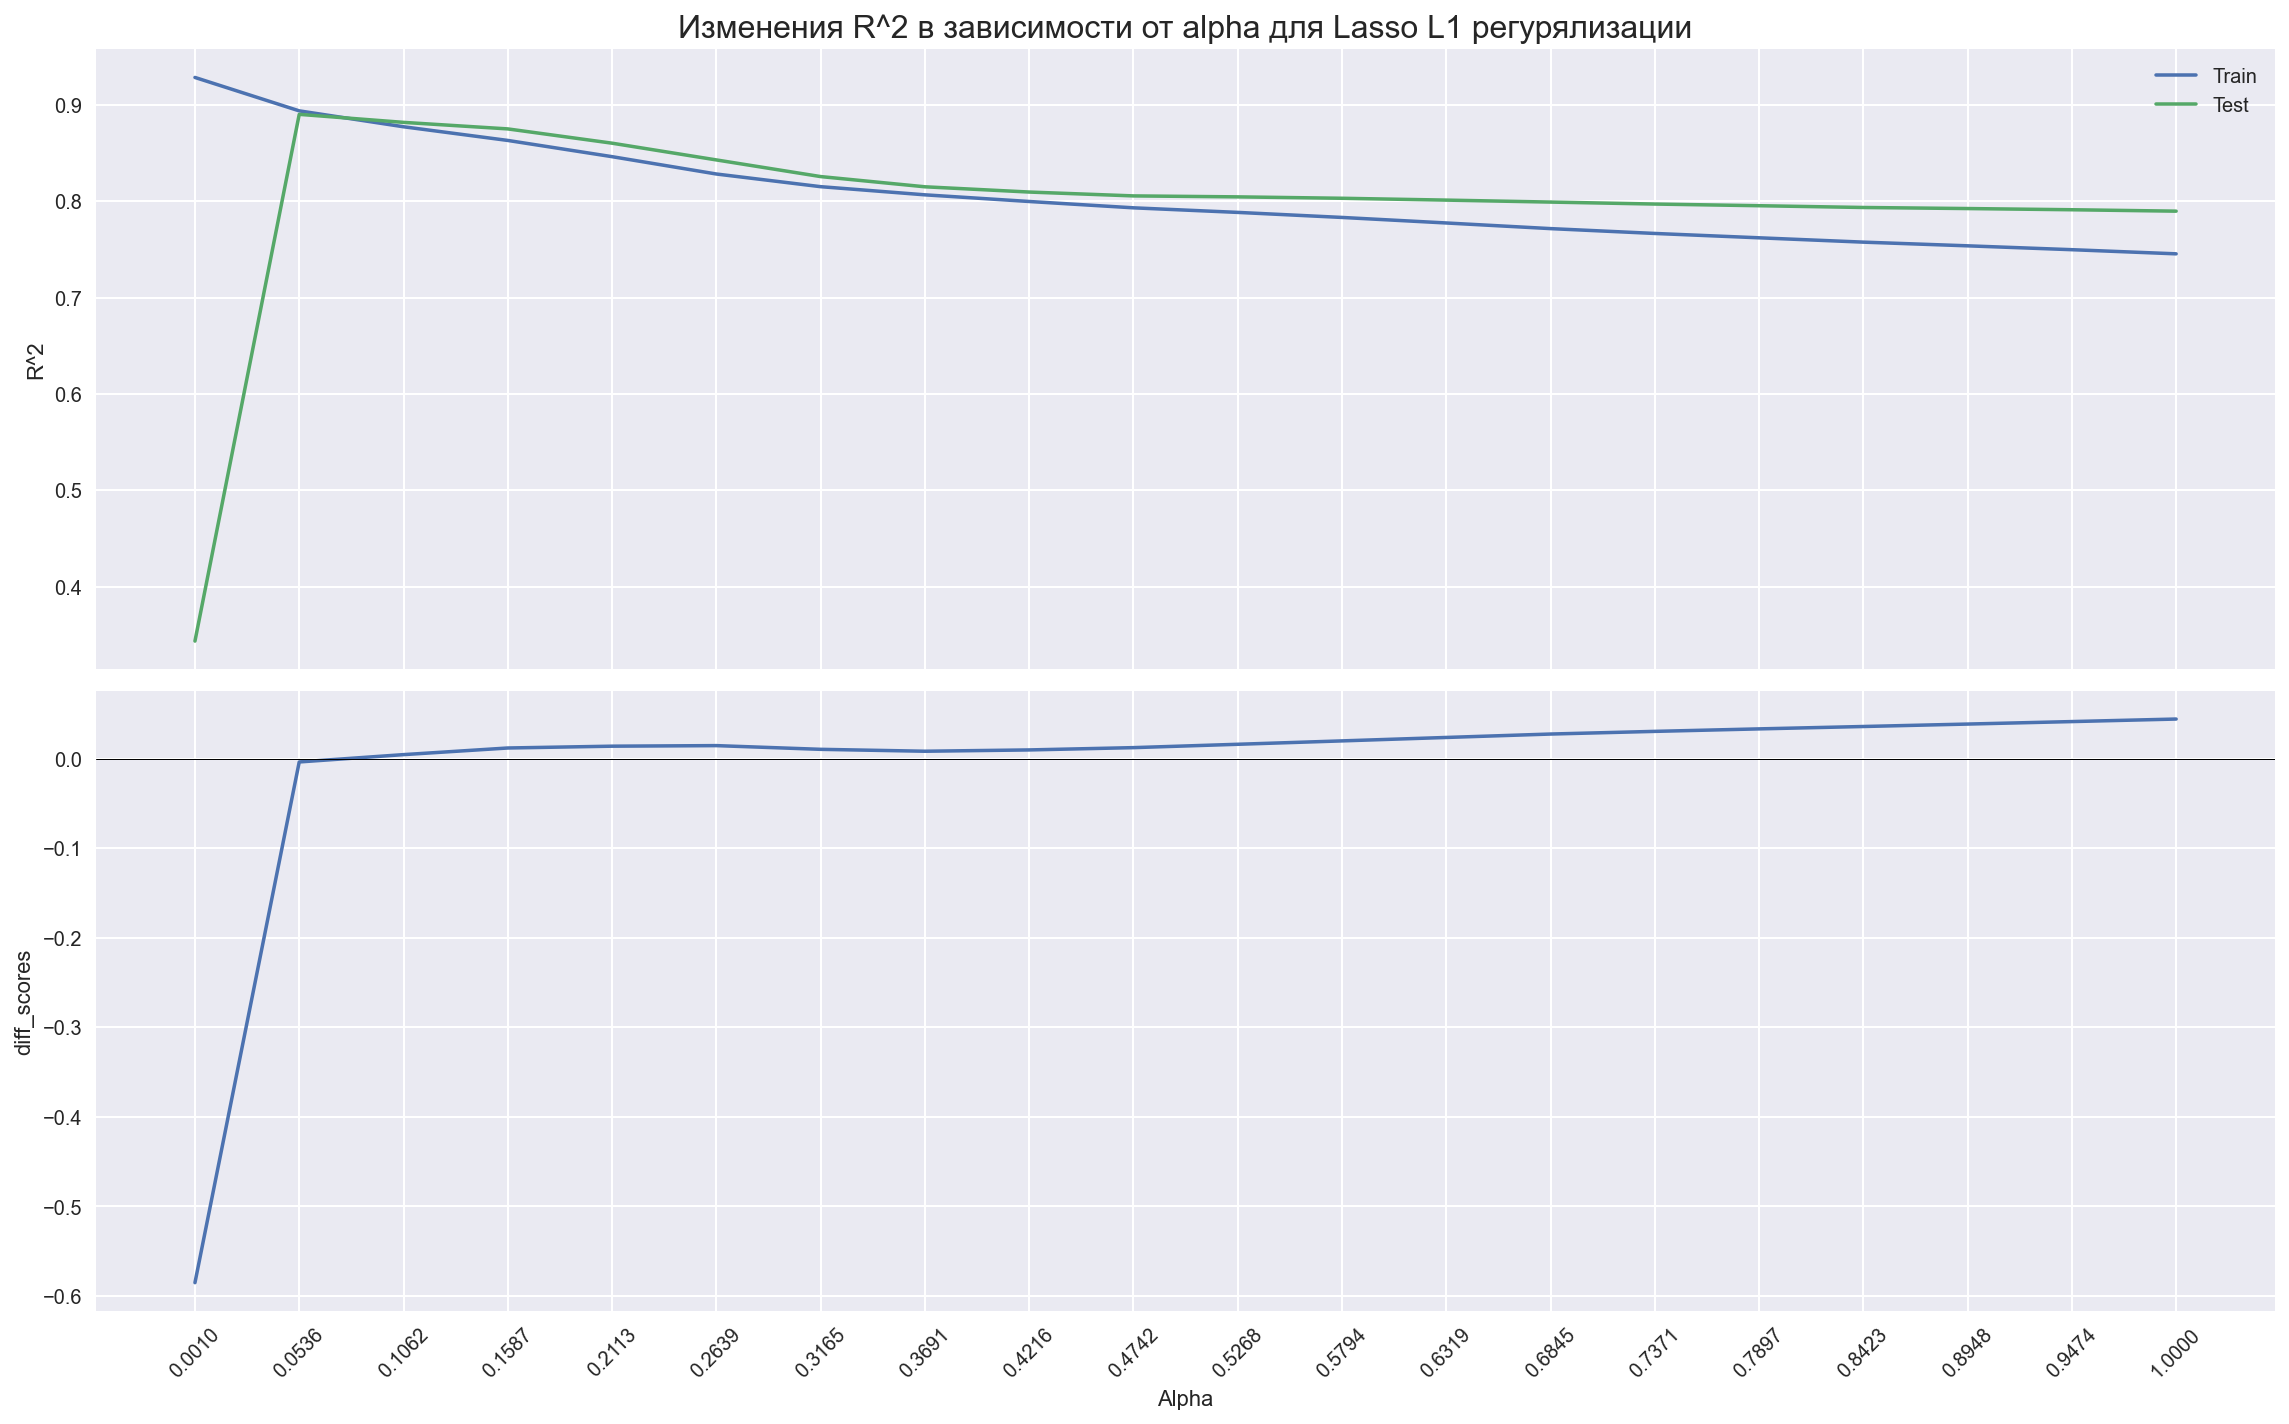

In [92]:
# Визуализируем изменение R^2 в зависимости от alpha
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(16, 10), sharex=True) # фигура + координатная плоскость
ax0.set_title('Изменения R^2 в зависимости от alpha для Lasso L1 регурялизации', fontsize=16)

ind = scores_df['alpha'].values
_0 = scores_df['train_scores'].values
_1 = scores_df['test_scores'].values
_2 = scores_df['diff_scores'].values

ax0.plot(ind, _0, label='Train') # линейный график для тренировочной выборки
ax0.plot(ind, _1, label='Test') # линейный график для тестовой выборки
ax1.plot(ind, _2) # разница в значениях метрики между train-test, фактически разброс

ax1.set_xlabel('Alpha') # название оси абсцисс
ax0.set_ylabel('R^2') # название оси ординат
ax1.set_ylabel('diff_scores') # название оси ординат

ax1.set_xticks(alpha_list) # метки по оси абсцисс
ax1.xaxis.set_tick_params(rotation=45) # поворот меток на оси абсцисс
ax1.axhline(0, color='black', linewidth=0.5)

ax0.legend() # отображение легенды
plt.tight_layout(); # подгонка графиков

С помощью графика мы можем подобрать оптимальное значение параметра alpha. Нам нужна такая точка на оси абсцисс, при которой на тестовой выборке наблюдается максимальная метрика и при этом разница между метриками на тренировочной и тестовой выборках минимальна.

Видно, что  на тестовой выборке достигает наибольшего значения в точке 0.0536. Причём в этой точке наблюдается примерное равенство метрик на каждом наборе данных. Далее метрика на тестовой выборке начинает падать.

Обратите внимание, что на тренировочной выборке  непрерывно падает с ростом alpha. Оно и понятно, ведь чем больше alpha, тем сильнее регуляризация и тем меньше модель подстраивается под обучающую выборку.

In [93]:
alpha = 0.0558

# Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=alpha)

# Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.893
Test R^2: 0.890


In [94]:
# Создаём список из 30 значений
alpha_list = np.linspace(20, 50, 60)

# Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L2-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    
    # Обучаем модель
    ridge_lr_poly.fit(X_train_scaled_poly, y_train)
    
    # Делаем предсказание для тренировочной выборки
    y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
    
    # Делаем предсказание для тестовой выборки
    y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
    
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

In [95]:
scores_df = pd.DataFrame({'alpha': alpha_list, 'train_scores': train_scores, 'test_scores': test_scores})
scores_df['diff_scores'] = scores_df['test_scores'] - scores_df['train_scores']

In [96]:
scores_df

,alpha,train_scores,test_scores,diff_scores
0,20.000000,0.898290,0.883280,-0.015009
1,20.508475,0.897919,0.883875,-0.014044
2,21.016949,0.897553,0.884411,-0.013142
3,21.525424,0.897192,0.884891,-0.012301
4,22.033898,0.896837,0.885321,-0.011515
5,22.542373,0.896486,0.885704,-0.010782
6,23.050847,0.896140,0.886043,-0.010097
7,23.559322,0.895798,0.886341,-0.009458
8,24.067797,0.895461,0.886600,-0.008861
9,24.576271,0.895127,0.886824,-0.008303


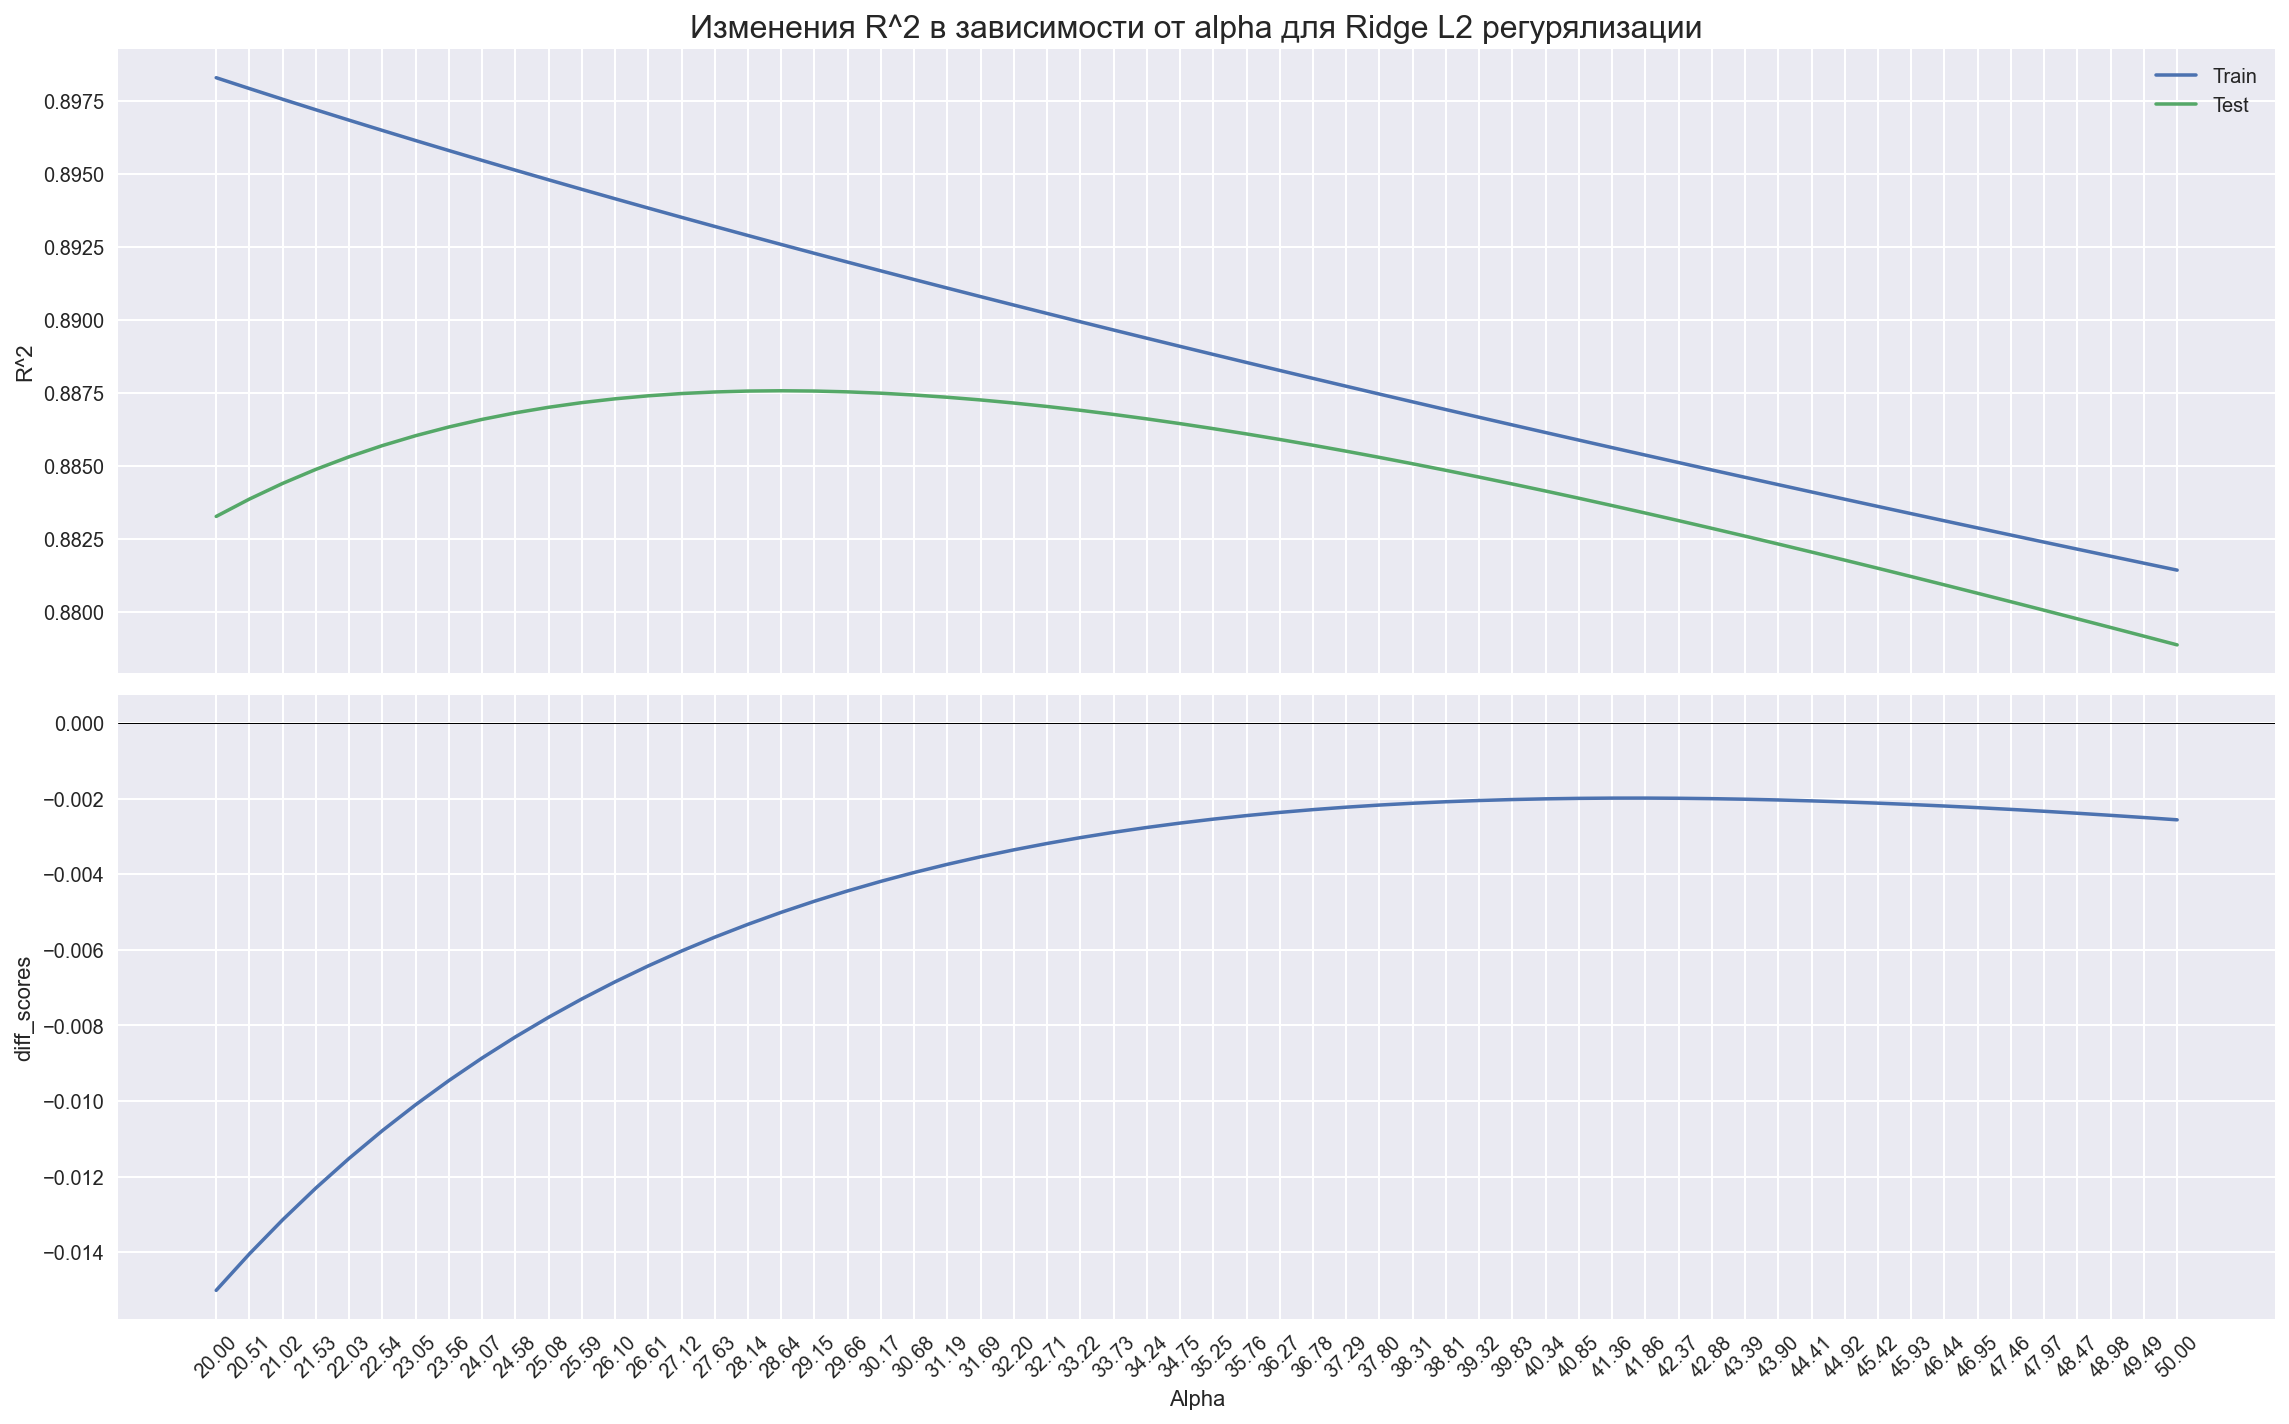

In [97]:
# Визуализируем изменение R^2 в зависимости от alpha
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(16, 10), sharex=True) # фигура + координатная плоскость
ax0.set_title('Изменения R^2 в зависимости от alpha для Ridge L2 регурялизации', fontsize=16)

ind = scores_df['alpha'].values
_0 = scores_df['train_scores'].values
_1 = scores_df['test_scores'].values
_2 = scores_df['diff_scores'].values

ax0.plot(ind, _0, label='Train') # линейный график для тренировочной выборки
ax0.plot(ind, _1, label='Test') # линейный график для тестовой выборки
ax1.plot(ind, _2) # разница в значениях метрики между train-test, фактически разброс

ax1.set_xlabel('Alpha') # название оси абсцисс
ax0.set_ylabel('R^2') # название оси ординат
ax1.set_ylabel('diff_scores') # название оси ординат

ax1.set_xticks(alpha_list) # метки по оси абсцисс
ax1.xaxis.set_tick_params(rotation=45) # поворот меток на оси абсцисс
ax1.axhline(0, color='black', linewidth=0.5)

ax0.legend() # отображение легенды
plt.tight_layout(); # подгонка графиков

Выбираю значение гиперпарамтера ориентируясь на график.
Там где у тествого значения максимум или чуть правее где падает разброс, т.е. разница между тренинговой и тестовой частью.

In [98]:
alpha = 29
# Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=alpha)

# Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.892
Test R^2: 0.888
